<h1> IS362 Week 12 Assignment 8 </h1>

Start with the mushroom data in the pandas DataFrame that you constructed in your “Assignment –
Preprocessing Data with sci-kit learn.”
• Use scikit-learn to determine which of the two predictor columns that you selected (odor and one 
other column of your choice) most accurately predicts whether or not a mushroom is poisonous. There is
an additional challenge here—to use scikit-learn’s predictive classifiers, you’ll want to convert each of
your two (numeric categorical) predictor columns into a set of columns. See for one approach pandas
get_dummies() method.
• Clearly state your conclusions along with any recommendations for further analysis.

In [261]:
#From the ucimlrepo https://archive.ics.uci.edu/dataset/73/mushroom download the dataset into Pandas.
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

<h2> Lets focus on Cap-color and habitat</h2>
Using seaborn to plot the basic relationships for count and poisonous.
To prepare data for Kmeans clustering.

C:\Users\turin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\turin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\turin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\turin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


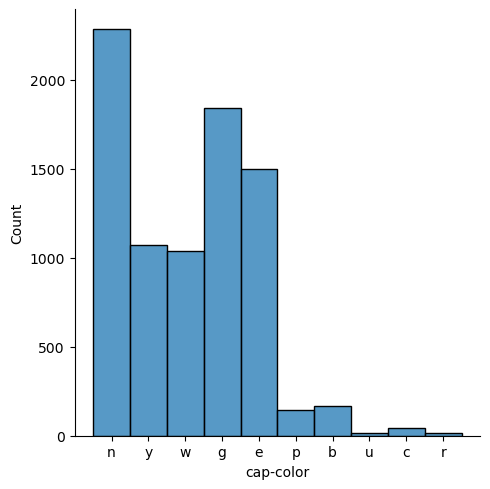

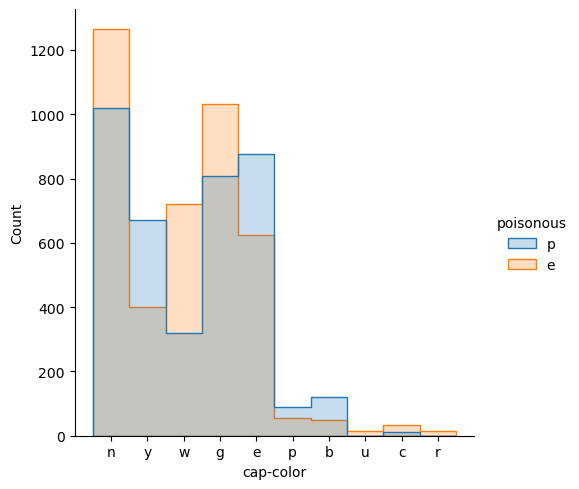

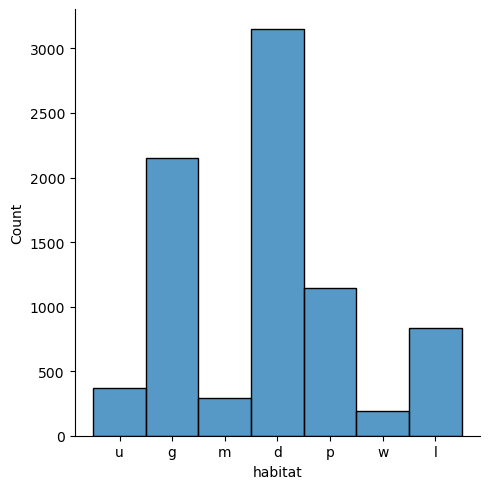

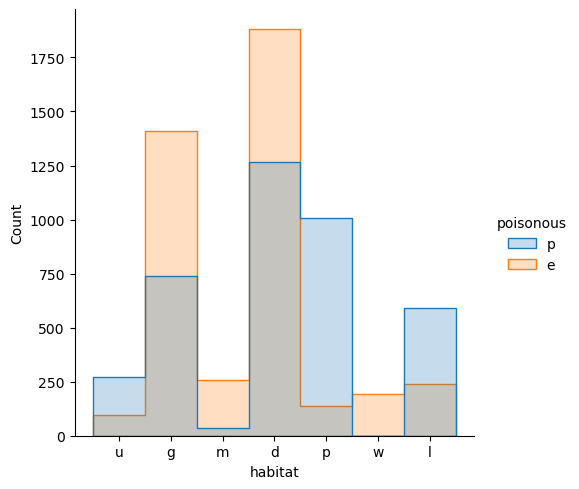

In [209]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl

df= pd.concat([X, y], axis=1, join='inner')
sns.displot(X, x="cap-color", bins=[1, 2, 3, 4, 5, 6, 7])
sns.displot(df, x="cap-color", hue="poisonous", element="step")
sns.displot(X,x="habitat",bins=[1, 2, 3, 4, 5, 6, 7])
sns.displot(df, x="habitat", hue="poisonous", element="step")

<h2> Nearest neighbor in scikit learn </h2> 

Using the tutorial: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

Develop a nearest neighbor plot for cap-color and habitat.

In [230]:
# Develop test and training data set from cap-color and habitat.
from sklearn.model_selection import train_test_split

X["cap-color"]=X["cap-color"].replace({"n":.1,"b":.2,"c":.3,"g":.4,"r":.5, "p":.6,"u":.7,"e":.8,"w":.9,"y":1}).fillna(0)
X["habitat"]=X["habitat"].replace({"g":1,"l":2,"m":3,"p":4,"u": 5,"w":6,"d":7,"g":8,"m":9}).fillna(0)
y["poisonous"]=y["poisonous"].replace({"p":10,"e":5}).fillna(0)

#In order to solve many types of errors in the plot, y or target variable must be converted to 1D array.
y=y.squeeze().ravel()
X1=X[["cap-color", "habitat"]]


X1_train, X1_test, y_train, y_test = train_test_split(X1, y, stratify=y, random_state=0)



C:\Users\turin\AppData\Local\Temp\ipykernel_22720\3843034751.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cap-color"]=X["cap-color"].replace({"n":.1,"b":.2,"c":.3,"g":.4,"r":.5, "p":.6,"u":.7,"e":.8,"w":.9,"y":1}).fillna(0)
C:\Users\turin\AppData\Local\Temp\ipykernel_22720\3843034751.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["habitat"]=X["habitat"].replace({"g":1,"l":2,"m":3,"p":4,"u": 5,"w":6,"d":7,"g":8,"m":9}).fillna(0)
C:\Users\turin\AppData\Local\Temp\ipykernel_22720\3843034751.py

In [166]:
#Scale the data beforehand with classifier. Following the tutorial above.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

C:\Users\turin\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\turin\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


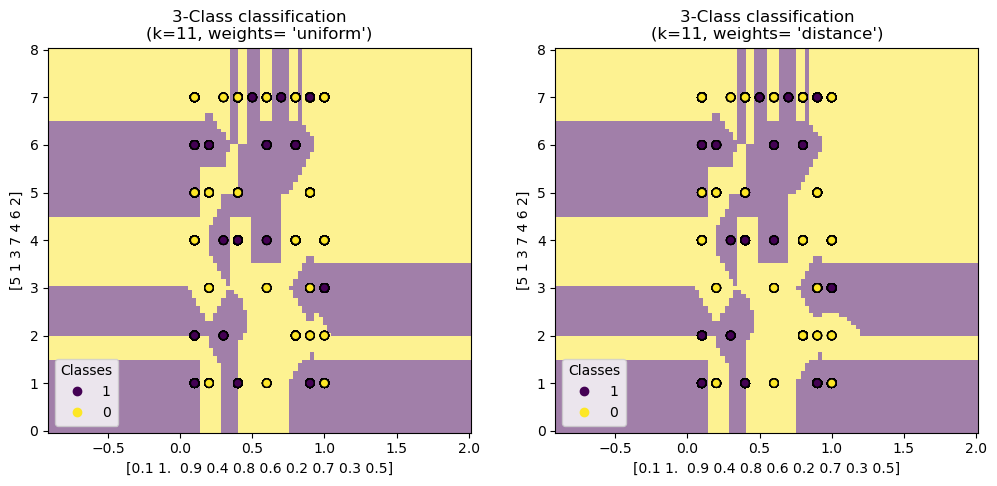

In [182]:
#Plot boundary conditions and data point using the tutorial format

#Note a lot of data transformations had to be done to get this to work. Using the .squeeze().ravel() for y. And using .unique() for X1

import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X1_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X1_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=X1["cap-color"].unique(),
        ylabel=X1["habitat"].unique(),
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        y, #Note we use the squeeze.ravel y here.
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights= {weights!r})"
    )

plt.show()

<h2> Conclusion from the nearest neighbor plot using scikit learn</h2>

Red and Brown cap-color in wet, woods, and waste habitats are very likely poisonous. Habitat and cap-color have a strong relationship for specific variables. To build a thorough test of this relationship could be done through more multivariate visualizations or statistical relationships. But the graphs below largely match the trend shown in the nearest neighbor plot.

Finally we will try Nearest Centroid classification.

C:\Users\turin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


,cap-color,habitat
cap-color,1.000000,0.200399
habitat,0.200399,1.000000


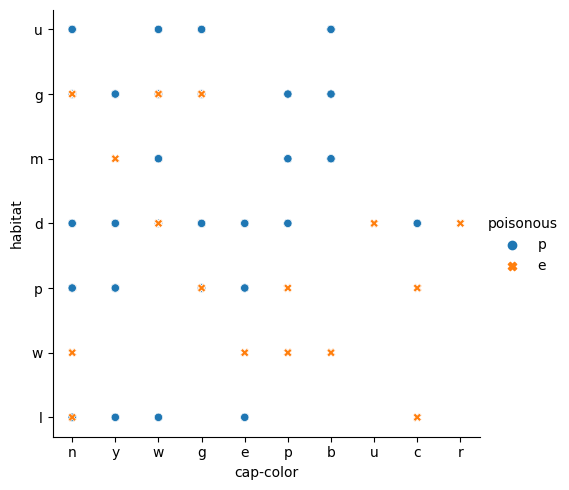

In [244]:
sns.relplot(
    data=df,
    x="cap-color", y="habitat", hue="poisonous", style="poisonous"
)

X1.corr()

